Previo


In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

Probar Poisson


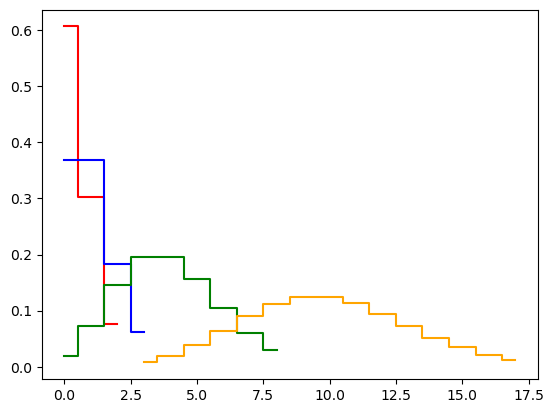

In [5]:
fig, ax = plt.subplots(1, 1)

mu = [0.5, 1, 4, 10]
colors = ['red', 'blue', 'green', 'orange']
# mean, var, skew, kurt = poisson.stats(mu, moments="mvsk")

for i in range(len(mu)):
    x = np.arange(poisson.ppf(0.01, mu[i]), poisson.ppf(0.99, mu[i]))
    ax.step(x, poisson.pmf(x, mu[i]), label=f"poisson pmf (mu={mu[i]})", where='mid', color=colors[i])
    # ax.vlines(x, 0, poisson.pmf(x, mu[i]), lw=5, alpha=0.5)
plt.show()

Poisson con el "randomizer"


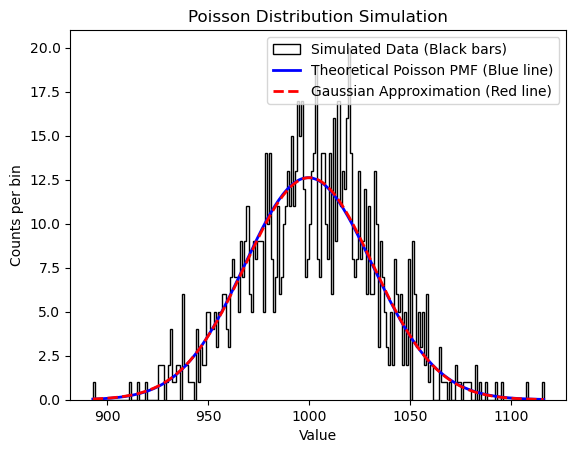

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Parameters
mu = 1000
N = 1000

# Generate Poisson distributed random variables
data = [poisson.rvs(mu, size=1) for i in range(N)]
data = np.concatenate(data)

# Create histogram of the random variables
plt.hist(
    data,
    bins=range(min(data), max(data) + 1),
    alpha=1,
    histtype="step",
    fill=False,
    label="Simulación",
    color="black",
)

# Calculate Poisson pmf
x = np.arange(min(data), max(data) + 1)
pmf = N * poisson.pmf(x, mu)

# Plot the theoretical distribution
plt.plot(x, pmf, "blue", lw=2, label="PMF Poisson teórica")

# Plot gaussian distribution for comparison
gaussian = norm.pdf(x, mu, np.sqrt(mu)) * N
plt.plot(
    x, gaussian, "red", lw=2, label="Aproximación Gaussiana", linestyle="--"
)

# Add labels and title
plt.ylabel("cuentas/bin")
plt.title("Distribución de Poisson Simulada")
plt.legend()

# Show plot
plt.show()

In [7]:
# Parámetros iniciales
N0 = 100  # Número inicial de núcleos
tau = 10  # Tiempo de vida medio (arbitrario)
delta_t = 1  # Intervalo de tiempo

poisson.pmf(0, mu=N0 * (delta_t / tau))

4.5399929762484854e-05

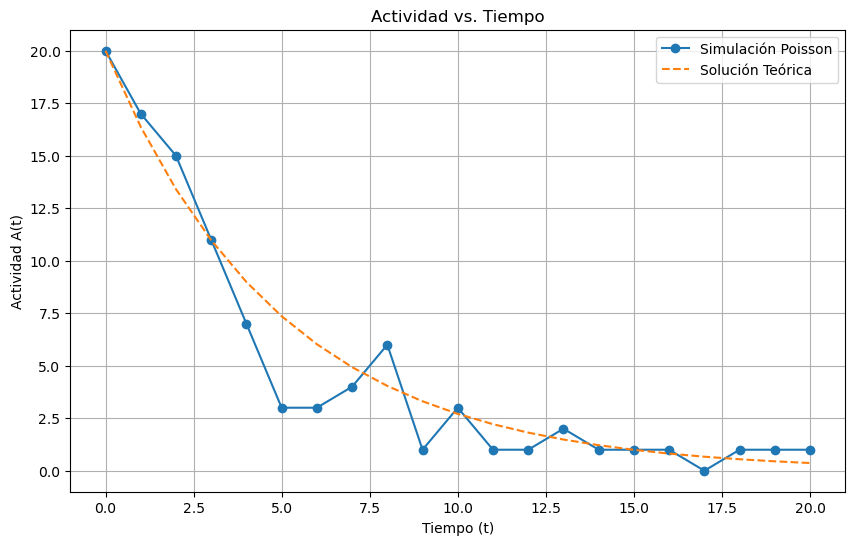

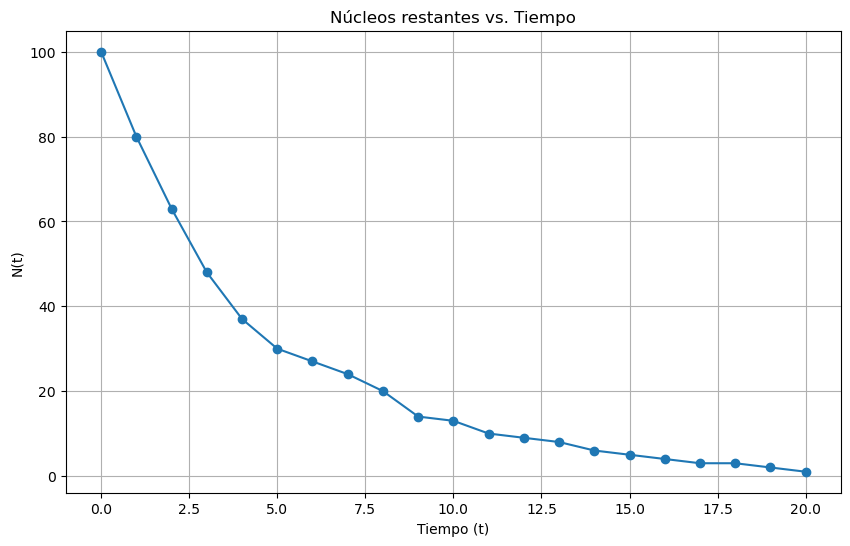

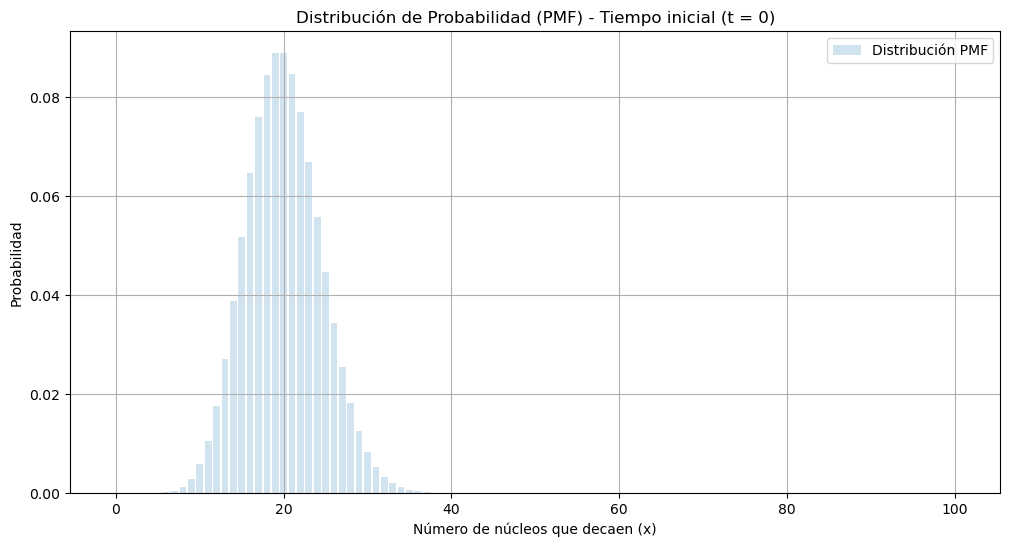

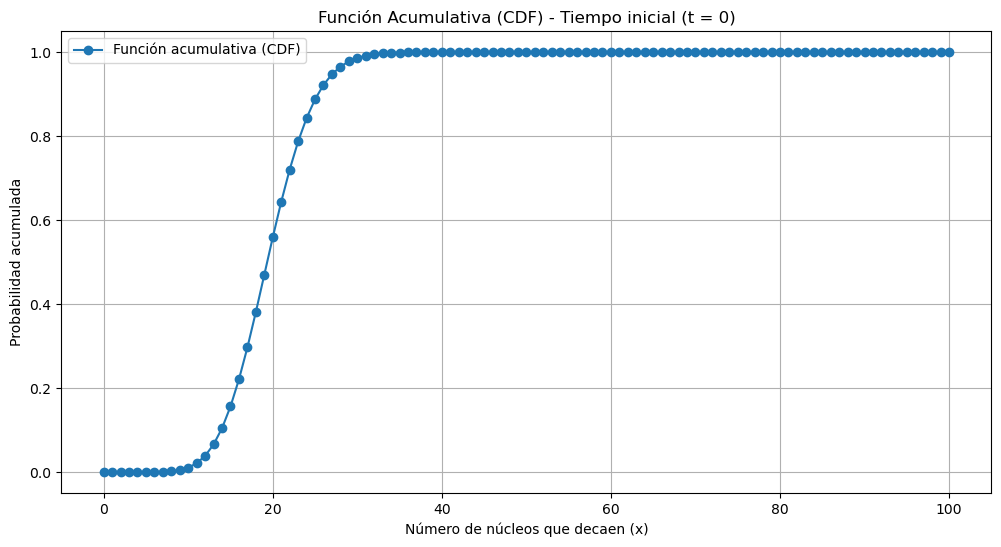

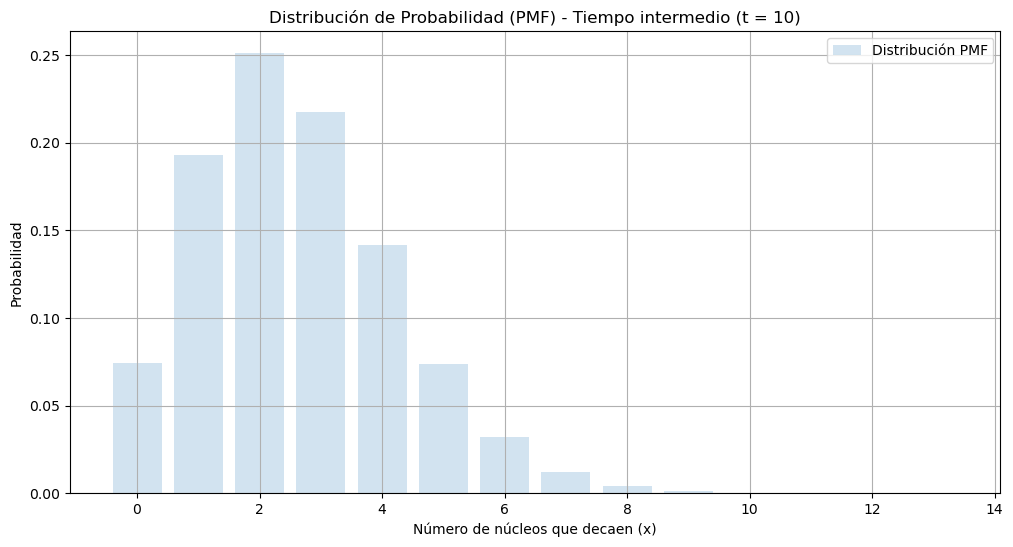

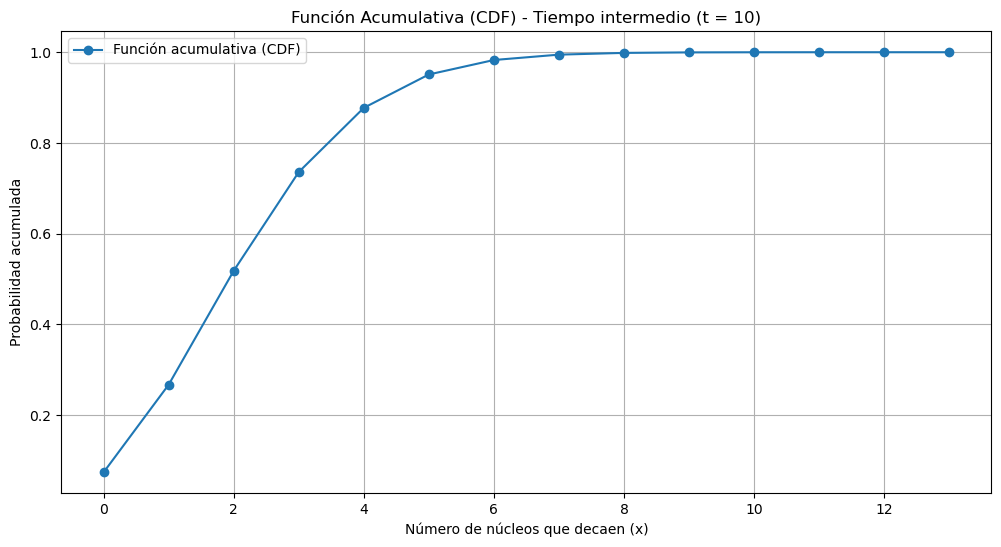

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros iniciales
N0 = 100  # Número inicial de núcleos
lifetime = 5  # Tiempo de vida promedio del núcleo
delta_t = 1  # Intervalo de tiempo

# Definir constantes
mu = delta_t / lifetime

def simulate_decay(N0, Delta_t, mu):
    t_values = []
    A_values = []
    N_values = []
    pmf_values = []  # Para guardar la función de masa de probabilidad
    cdf_values = []  # Para guardar la función acumulativa

    N_t = N0
    t = 0

    while N_t > 0:
        # Generar número de decaimientos usando Poisson
        X = poisson.rvs(mu=N_t * mu)
        
        # Calcular actividad
        A_t = X / Delta_t

        # Calcular PMF y CDF
        x = np.arange(0, N_t + 1)
        pmf = poisson.pmf(x, mu=N_t * mu)
        cdf = poisson.cdf(x, mu=N_t * mu)

        # Guardar valores para gráficos
        t_values.append(t)
        A_values.append(A_t)
        N_values.append(N_t)
        pmf_values.append(pmf)
        cdf_values.append(cdf)

        # Actualizar el número de núcleos restantes y el tiempo
        N_t -= X
        t += Delta_t

    return np.array(t_values), np.array(A_values), np.array(N_values), pmf_values, cdf_values

def plot_poisson_distribution(x, pmf, cdf, time_label):
    # Graficar la distribución de probabilidad
    plt.figure(figsize=(12, 6))
    plt.bar(x, pmf, alpha=0.2, label='Distribución PMF')
    plt.title(f'Distribución de Probabilidad (PMF) - {time_label}')
    plt.xlabel('Número de núcleos que decaen (x)')
    plt.ylabel('Probabilidad')
    plt.grid()
    plt.legend()
    plt.show()

    # Graficar la función acumulativa
    plt.figure(figsize=(12, 6))
    plt.plot(x, cdf, marker='o', label='Función acumulativa (CDF)')
    plt.title(f'Función Acumulativa (CDF) - {time_label}')
    plt.xlabel('Número de núcleos que decaen (x)')
    plt.ylabel('Probabilidad acumulada')
    plt.grid()
    plt.legend()
    plt.show()

# Simulación
t_values, A_values, N_values, pmf_values, cdf_values = simulate_decay(N0, delta_t, mu)

# Graficar actividad A(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, A_values, label='Simulación Poisson', marker='o')

# Comparar con la solución teórica A(t) = A(0) * exp(-t / tau)
theoretical_A = (N0 / lifetime) * np.exp(-np.array(t_values) / lifetime)
plt.plot(t_values, theoretical_A, label='Solución Teórica', linestyle='--')

# Configuración de gráficos
plt.title('Actividad vs. Tiempo')
plt.xlabel('Tiempo (t)')
plt.ylabel('Actividad A(t)')
plt.legend()
plt.grid()
plt.show()

# Graficar N(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, N_values, label='Simulación Poisson', marker='o')
plt.title('Núcleos restantes vs. Tiempo')
plt.xlabel('Tiempo (t)')
plt.ylabel('N(t)')
plt.grid()
plt.show()

# Gráficos solicitados para el tiempo inicial y un tiempo intermedio
plot_poisson_distribution(np.arange(0, N0 + 1), pmf_values[0], cdf_values[0], 'Tiempo inicial (t = 0)')
plot_poisson_distribution(np.arange(0, N_values[len(N_values)//2] + 1), pmf_values[len(N_values)//2], cdf_values[len(N_values)//2], f'Tiempo intermedio (t = {t_values[len(t_values)//2]})')


In [50]:
def foo(n):
    l = [i for i in range(n)]
    def bar(x):
        return l[x]
    return bar

bar = foo(5)
print(bar(3))

3


Codigo temporal

In [ ]:
def poisson_decay(N0, tau, delta_t):
    r"""
    Simula el decaimiento nuclear usando la distribución de Poisson.

    Args:
        N0 (int): Número inicial de núcleos
        delta_t (float): Intervalo de tiempo :math:`\Delta t`.
        tau (float): Tiempo de vida medio de los núcleos :math:`\tau`.

    Returns:
        t_values: Tiempos :math:`t_i` en los que se evalúa la actividad.
        A_values: Actividad :math:`A(t_i)` en los tiempos :math:`t_i`.
        N_values: Número de núcleos restantes :math:`N(t_i)` en los tiempos :math:`t_i`.
        pmf_values: Distribuciones de probabilidad de Poisson en cada paso :math:`P_p(x)`.
        cdf_values: Funciones acumulativas de Poisson en cada paso :math:`F(x)`.
    """
    t_values = []
    A_values = []
    N_values = []
    pmf_values = []  # Para guardar la función de masa de probabilidad
    cdf_values = []  # Para guardar la función acumulativa

    N_t = N0
    t = 0

    while N_t > 0:
        # Calcular media de distribución Poisson
        mu = N_t * (delta_t / tau)

        # Generar número de decaimientos usando Poisson
        X = poisson.rvs(mu=mu)

        # Calcular actividad
        A_t = X / delta_t

        # Calcular PMF y CDF
        x = np.arange(0, N_t + 1)
        pmf = poisson.pmf(x, mu=mu)
        cdf = poisson.cdf(x, mu=mu)

        # Guardar valores para gráficos
        t_values.append(t)
        A_values.append(A_t)
        N_values.append(N_t)
        pmf_values.append(pmf)
        cdf_values.append(cdf)

        # Actualizar el número de núcleos restantes y el tiempo
        N_t -= X
        t += delta_t

    return (
        np.array(t_values),
        np.array(A_values),
        np.array(N_values),
        pmf_values,
        cdf_values,
    )

# test
if True:
    ps = poisson_decay(
        N0=1000, delta_t=1, tau=10
    )
    plt.plot(ps[0], ps[1], label='Actividad')

In [64]:
# find the index of an element in a list
l = ['alpha', 'beta', 'gamma']
print(l.index('beta'))

1


Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

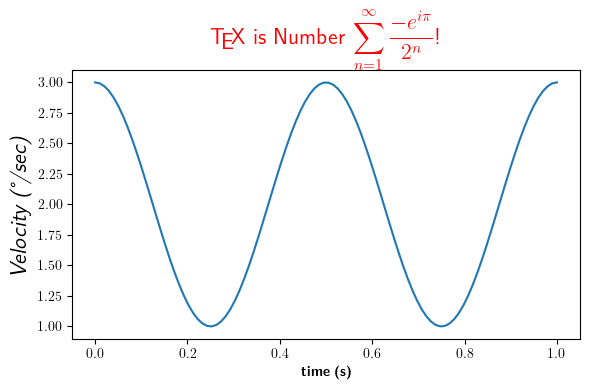

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

Mosaico 1 grande 2 pequeños

Text(0.5, 1.0, 'Plot Bottom Right')

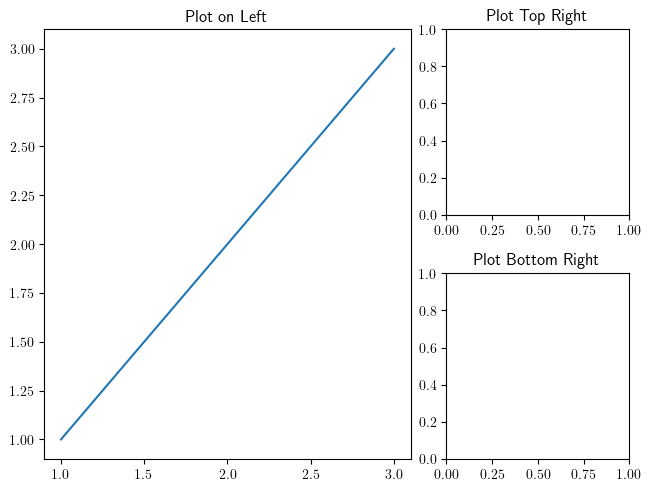

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(constrained_layout=True)
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
axs['Left'].set_title('Plot on Left')
axs['Left'].plot([1, 2, 3], [1, 2, 3])
axs['TopRight'].set_title('Plot Top Right')
axs['BottomRight'].set_title('Plot Bottom Right')

In [13]:
# Calcular una incertidumbre
from uncertainties import ufloat

a0 = ufloat(35, 14)
a1 = ufloat(2.427, 0.015)

b0 = -a0/a1
b1 = 1/a1

print(a0/a1, 1/a1, sep='   ')

14+/-6   0.4120+/-0.0025


In [26]:
def energia(x):
    return b1 * x + b0  # dado en keV

def inversa_energia(y):
    return (y - b0) / b1

# Ejemplo de uso
print(energia(993))
print(inversa_energia(209.8))

395+/-6
544+/-14


In [20]:
# Constantes en el sistema internacional
e = 1.602176634e-19  # Carga del electrón en coulombs
m_e = 9.10938356e-31  # Masa del electrón en kilogramos
c = 2.99792458e8  # Velocidad de la luz en metros por segundo

E1 = 1173

epsilon = E1/(m_e * c**2)
Ec = E1 * 2* epsilon / (1+ 2*epsilon)

print(Ec)

1173.0
